In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("../datasets/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<AxesSubplot:>

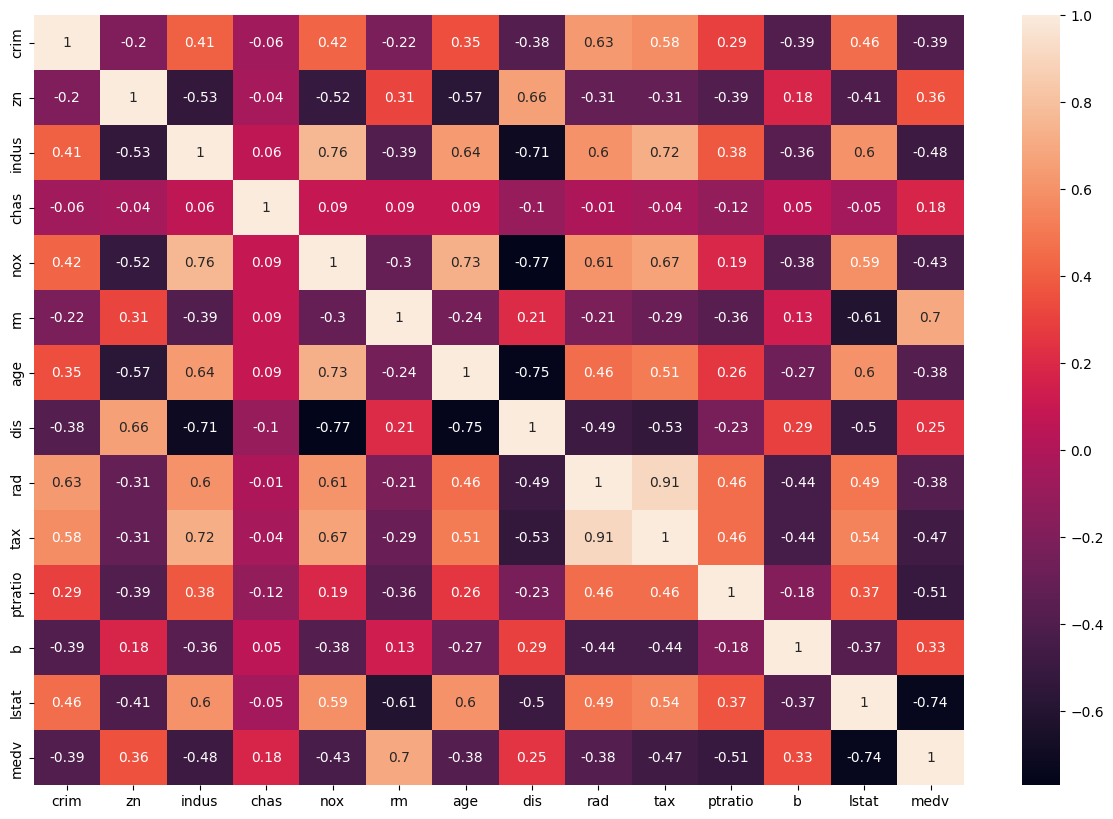

In [4]:
c = df.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(c , annot=True)

<AxesSubplot:xlabel='medv', ylabel='Count'>

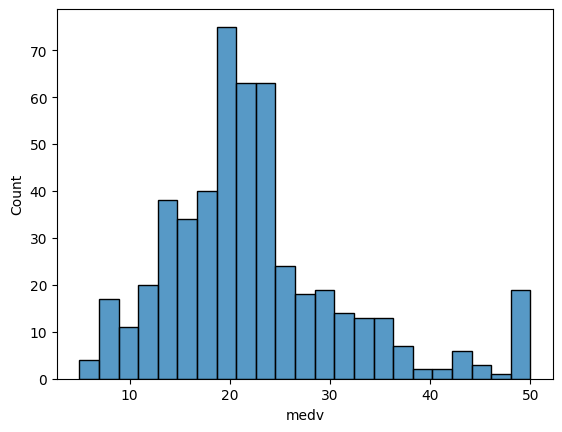

In [5]:
sns.histplot(df["medv"])

<AxesSubplot:xlabel='lstat', ylabel='medv'>

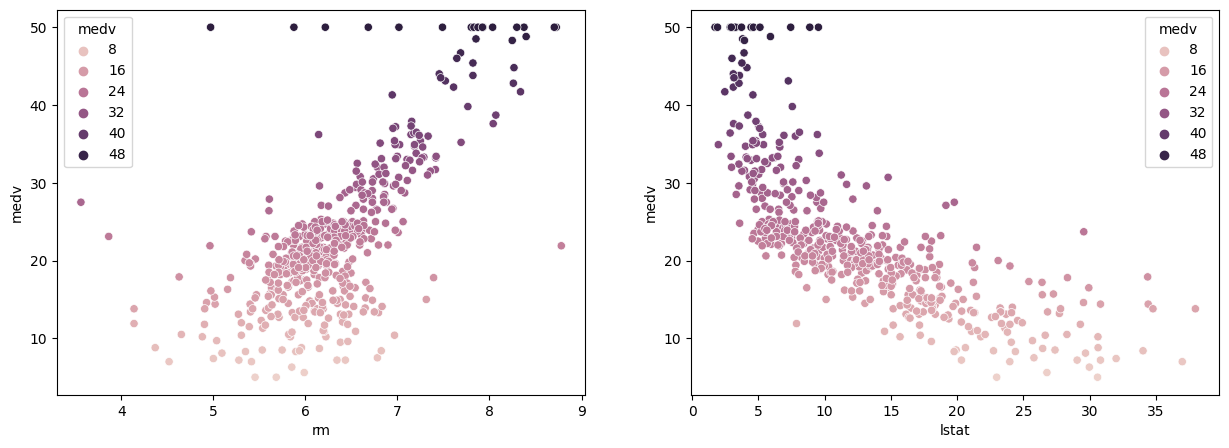

In [6]:
plt.figure(figsize=(15 , 5))

plt.subplot(1 , 2 , 1)
sns.scatterplot(df , x="rm" , y="medv" , hue="medv")

plt.subplot(1 , 2 , 2)
sns.scatterplot(df , x="lstat" , y="medv" , hue="medv")

In [7]:
x = df[["rm" , "lstat"]].values
y = df["medv"].values

In [8]:
indices = np.where(y != 50)[0]

data_x = x[indices]
data_y = y[indices]
# data_x.shape

Text(0, 0.5, 'medv')

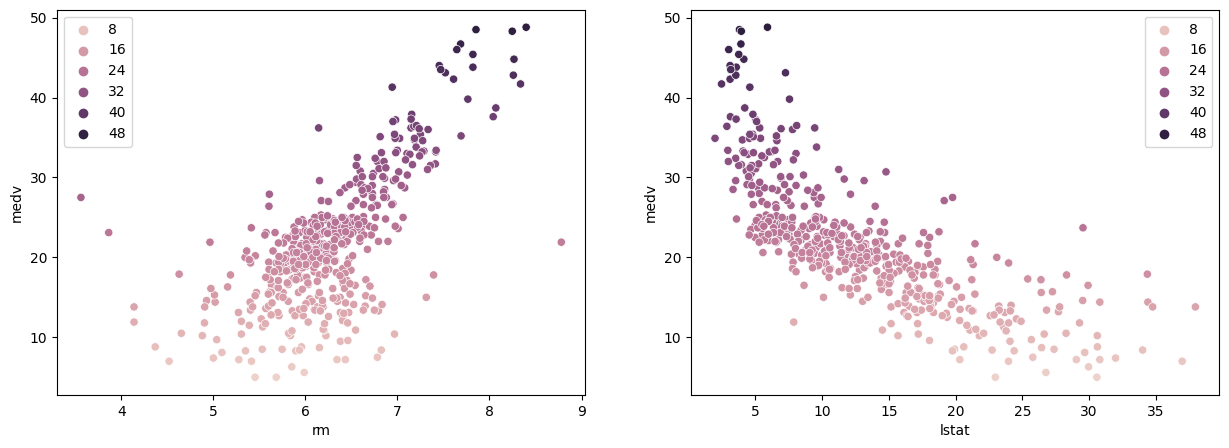

In [9]:
plt.figure(figsize=(15 , 5))


plt.subplot(1 , 2 , 1)
sns.scatterplot(x=data_x[:,0] , y=data_y , hue=data_y)
plt.xlabel("rm")
plt.ylabel("medv")


plt.subplot(1 , 2 , 2)
sns.scatterplot(x=data_x[:,1] , y=data_y , hue=data_y)
plt.xlabel("lstat")
plt.ylabel("medv")

In [10]:
s = data_y.std()
f = np.where((data_y <  data_y.mean() + 3*s) & (data_y > data_y.mean() - 3*s ))[0]

data_x = data_x[f]
data_y = data_y[f]
data_x.shape

(484, 2)

Text(0, 0.5, 'medv')

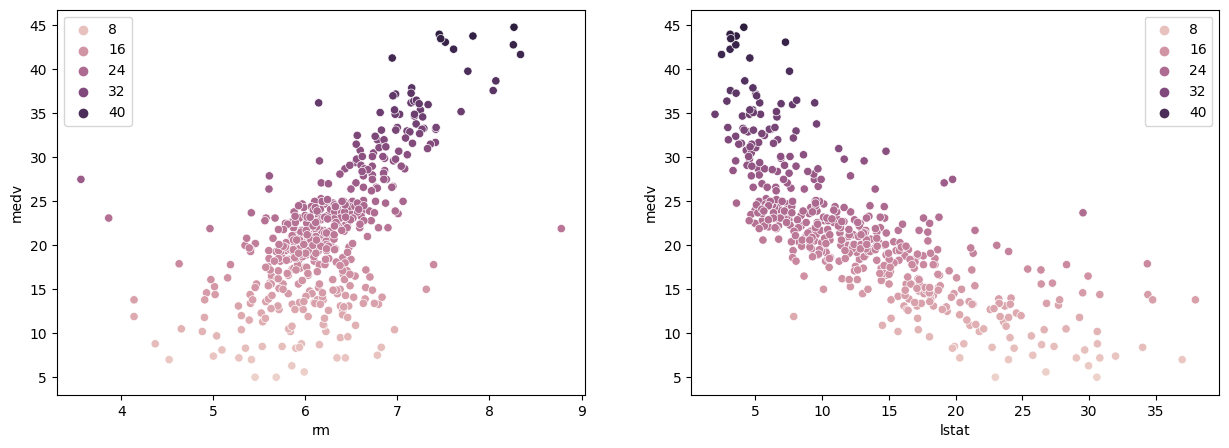

In [11]:
plt.figure(figsize=(15 , 5))


plt.subplot(1 , 2 , 1)
sns.scatterplot(x=data_x[:,0] , y=data_y , hue=data_y)
plt.xlabel("rm")
plt.ylabel("medv")


plt.subplot(1 , 2 , 2)
sns.scatterplot(x=data_x[:,1] , y=data_y , hue=data_y)
plt.xlabel("lstat")
plt.ylabel("medv")

In [12]:
x_train , x_test , y_train , y_test = train_test_split(data_x , data_y , test_size=0.2)

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train , y_train)

LinearRegression()

In [15]:
print(f"model coef is {model.coef_}")
print(f"model intercept is {model.intercept_}")

model coef is [ 3.42962036 -0.64872335]
model intercept is 8.446328684076397


In [16]:
model.score(x_test , y_test)

0.6236755015832244

In [17]:
mean_absolute_error(y_train , model.predict(x_train))

3.331063203904034

In [18]:
mean_absolute_error(y_test , model.predict(x_test))

3.391184184856093